In [1]:
import sys
sys.path.append('..')
import queueing_process.queueing_process as qp
import scipy.stats as ss
import numpy as np
import numpy.random as npr
import itertools
import seaborn as sns
import pandas as pd
sns.set()

In [2]:
def symptom_onset_to_joining_queue():
    return round(npr.gamma(
        shape=2.62**2/2.38**2,
        scale=2.38**2/2.62))

def test_processing_delay_dist():
    return round(ss.gamma.rvs(a=4.941424, scale=0.266155))

In [3]:
def incidence(time, growth_rate, starting_infections):
    proportion_of_cases_asking_for_a_test = 0.2

    incidence_out = proportion_of_cases_asking_for_a_test*starting_infections*(np.exp(growth_rate*time) - np.exp(growth_rate*(time-1)))

    return int(round(incidence_out))

def get_demand(max_time, growth_rate, starting_infections):

    return [incidence(time, growth_rate, starting_infections) for time in range(max_time)] 

In [4]:
areas = qp.deterministic_area_collection(
    test_processing_delay_dist=test_processing_delay_dist,
    symptom_onset_to_joining_queue_dist=symptom_onset_to_joining_queue
)

In [5]:
areas.add_area(
    area_name='Manchester',
    population_size=10000,
    demand=get_demand(50, 0.06, 100),
    capacity=[500]*50
)

In [6]:
areas.add_area(
    area_name='Liverpool',
    population_size=8000,
    demand=get_demand(50, 0.05, 120),
    capacity=[400]*50
)

In [7]:
areas.add_area(
    area_name='York',
    population_size=6000,
    demand=get_demand(50, 0.04, 120),
    capacity=[350]*50
)

In [8]:
areas.simulate_all_areas()

In [9]:
areas.evaluate_objective_function(40)

906384.1269841269

# Simple experiment - which area should get an additional 200 test added

In [11]:
days_to_sim = 70

areas = qp.deterministic_area_collection(
    test_processing_delay_dist=test_processing_delay_dist,
    symptom_onset_to_joining_queue_dist=symptom_onset_to_joining_queue
)

areas.add_area(
    area_name='Manchester',
    population_size=10000,
    demand=get_demand(days_to_sim, 0.06, 8000),
    capacity=[500]*days_to_sim
)

areas.add_area(
    area_name='Liverpool',
    population_size=8000,
    demand=get_demand(days_to_sim, 0.05, 9600),
    capacity=[400]*days_to_sim
)

areas.add_area(
    area_name='York',
    population_size=6000,
    demand=get_demand(days_to_sim, 0.04, 9600),
    capacity=[350]*days_to_sim
)

areas.simulate_all_areas()

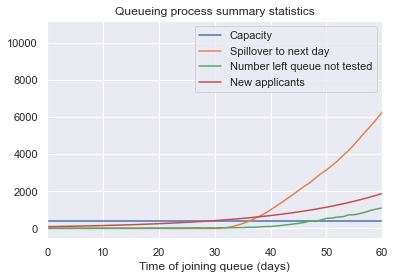

In [12]:
areas.areas[1].plot_summary_statistics()

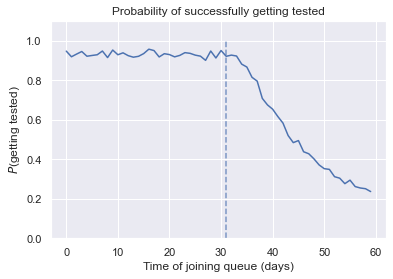

In [14]:
areas.areas[1].plot_prob_getting_tested()

# Experiments

In [40]:
number_of_repeats = 10
proposal_capacities = [[700, 500, 500], [500, 700, 500], [500, 500, 700]]
proposal_capacities_with_repeats = []
capacity_id_range = list(range(3))
capacity_id_with_repeats = []

for capacity_id in capacity_id_range:
    for repeat in range(5):
        capacity_id_with_repeats.append(capacity_id)
        proposal_capacities_with_repeats.append(proposal_capacities[capacity_id])

In [32]:
proposal_capacities_with_repeats[0]

[700, 500, 500]

In [19]:
def eval_objective_function(capacities: list):

    areas = qp.deterministic_area_collection(
        test_processing_delay_dist=test_processing_delay_dist,
        symptom_onset_to_joining_queue_dist=symptom_onset_to_joining_queue
    )

    areas.add_area(
        area_name='Manchester',
        population_size=10000,
        demand=get_demand(50, 0.06, 100),
        capacity=[capacities[0]]*50
    )

    areas.add_area(
        area_name='Liverpool',
        population_size=8000,
        demand=get_demand(50, 0.05, 120),
        capacity=[capacities[1]]*50
    )

    areas.add_area(
        area_name='York',
        population_size=6000,
        demand=get_demand(50, 0.04, 120),
        capacity=[capacities[2]]*50
    )

    areas.simulate_all_areas()

    return areas.evaluate_objective_function(40)

In [37]:
results = list(map(eval_objective_function, proposal_capacities_with_repeats))
results_dataframe = pd.DataFrame()
results_dataframe['capacity_input'] = proposal_capacities_with_repeats
results_dataframe['capacity_id'] = capacity_id_with_repeats
results_dataframe['result'] = results

In [38]:
results_dataframe

,capacity_input,capacity_id,result
0,"[700, 500, 500]",0,890838.888889
1,"[700, 500, 500]",0,899824.242424
2,"[700, 500, 500]",0,895502.813853
3,"[700, 500, 500]",0,894319.913420
4,"[700, 500, 500]",0,876722.727273
5,"[500, 700, 500]",1,876115.151515
6,"[500, 700, 500]",1,890209.668110
7,"[500, 700, 500]",1,884490.115440
8,"[500, 700, 500]",1,880938.239538
9,"[500, 700, 500]",1,900694.083694


In [45]:
results_dataframe.groupby('capacity_id').result.mean() / results_dataframe.groupby('capacity_id').result.mean().max()

capacity_id
0    0.992888
1    0.987372
2    1.000000
Name: result, dtype: float64